# Rainfall Prediction for Drought Mitigation in Eastern Africa

In Eastern Africa, recurrent drought events have had a profound and devastating impact on both society and the economy. To address this pressing issue, this project leverages the power of Machine Learning (ML) techniques to improve high-resolution rainfall forecasts in the Eastern African region.

## Project Objectives

- **Improved Rainfall Forecasting**: Our primary goal is to enhance the accuracy of rainfall forecasts in Eastern Africa. By utilizing a variety of datasets, including remote sensing and meteorological data, we aim to develop robust ML models capable of predicting rainfall patterns.

- **Drought Mitigation**: In light of the recent and recurring droughts that have afflicted Eastern Africa, our project seeks to provide valuable tools for drought mitigation. Reliable rainfall forecasts are crucial for water resource management, agriculture, and disaster preparedness.

## Methodology

We will gather and process diverse data sources, including remote sensing data, historical meteorological data, temperature, wind, relative humidity, and specific humidity. These data will be used to train ML models for rainfall prediction. The project will emphasize the use of state-of-the-art techniques in data analysis, feature engineering, and model training.

### Data Preprocessing

To ensure data quality, we performed the following preprocessing steps:

- Data cleaning and missing value imputation.
- Temporal alignment of different datasets.
- **Outlier Detection using a Robust Z-Score**

#### Outlier Detection

In this section, we discuss the crucial process of outlier detection and its significance in our project. Outliers, or data points that deviate significantly from the majority of the data, can distort statistical analyses and machine learning models. Therefore, it is essential to identify and address outliers appropriately to ensure the integrity of our analysis.

#### Data Exploration

Before delving into outlier detection, we conducted basic data exploration. This included calculating basic statistics for the variables of interest, which are wind, temperature, specific humidity, relative humidity, and precipitation amount. Understanding the distribution and characteristics of these variables is crucial for outlier identification.

#### Robust Z-Score Method

To identify outliers, we employed the robust z-score method. Unlike the traditional z-score, the robust z-score is suitable for datasets that do not follow a normal distribution. The robust z-score calculation involves the following steps:

$$ z_{\text{score}} = 0.6745 \times \frac{(data - median)}{MAD}$$

1. Calculate the median of the data.
2. Determine the median absolute deviation (MAD) from the median.
3. Compute the z-score using the formula above.

#### Outlier Threshold

In our analysis, we defined a threshold value of 3.0 for the robust z-score. Any data point with an absolute z-score exceeding this threshold was considered an outlier.

#### Outlier Handling

Outliers were filtered from the dataset based on the defined threshold. The filtered data was used for subsequent analysis to ensure that outliers did not unduly influence our results.

#### Visualizations

To visualize the effect of outlier removal, we created distribution plots (histograms) and box plots for each variable of interest. These visualizations show the distribution and central tendencies of the data, both with and without outliers.

#### Conclusion

The outlier detection process is an integral part of our data preprocessing pipeline. It ensures that our statistical analyses and machine learning models are based on reliable data. By using the robust z-score method and a defined threshold, we identified and filtered outliers from the dataset, enhancing the accuracy and reliability of our results.

### Statistical Analysis

#### Descriptive Statistics

We conducted preliminary descriptive statistics on the rainfall data, including measures of central tendency, dispersion, and frequency distribution. These statistics help us better understand the characteristics of rainfall patterns in the region.

#### Correlation Interpretation

We analyzed the correlations between rainfall (Precipitation Amount) and various climate variables, including Wind, Temperature, Specific Humidity, and Relative Humidity. Below are the correlation coefficients and their interpretations:

- **Wind vs. Rainfall (Precipitation Amount):**
  - Correlation Coefficient: -0.54
  - Interpretation: There is a strong negative correlation between wind and rainfall. This means that higher wind speeds are slightly associated with lower rainfall amounts.

- **Miinimum Temperature vs. Rainfall (Precipitation Amount):**
  - Correlation Coefficient: -0.14
  - Interpretation: There is a weak negative correlation between temperature and rainfall. This suggests that higher temperatures are slightly associated with lower rainfall amounts.

- **Maximum Temperature vs. Rainfall (Precipitation Amount):**
  - Correlation Coefficient: 0.35
  - Interpretation: There is a moderate positive correlation between temperature and rainfall. This implies that higher temperature levels are moderately associated with higher rainfall amounts.

- **Relative Humidity vs. Rainfall (Precipitation Amount):**
  - Correlation Coefficient: 0.64
  - Interpretation: There is a strong positive correlation between relative humidity and rainfall. This indicates that higher relative humidity levels are highly associated with higher rainfall amounts.

These correlations provide valuable insights for your rainfall prediction machine learning model. Specifically, you can consider including variables related to specific humidity and relative humidity as potential predictors for your model, as they show a more significant positive correlation with rainfall compared to wind and temperature.

## Datasets

- Temperature and precipitation data are provided by the Climatic Research Unit (CRU). You can access the data [here](https://crudata.uea.ac.uk/cru/data/hrg/).
- Relative humidity, wind, and sea surface temperature (SST) data are provided by NOAA. You can access the data [here](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v3.html).

## Impact

The resulting forecasting system will play a pivotal role in reducing the impact of water-related disasters, especially droughts. It will provide timely and accurate information to support decision-makers, agricultural practices, and disaster response teams. Ultimately, the project aims to contribute to sustainable development in Eastern Africa, safeguarding lives and livelihoods.

## Open Source and Collaboration

Collaboration with experts, researchers, and organizations working in the field of meteorology, agriculture, and climate resilience is encouraged to ensure the widest possible impact.

By focusing on Eastern Africa's pressing need for improved rainfall prediction, this project aims to make a meaningful contribution to the region's resilience against drought and its journey toward sustainable development.

## Author

Jean Claude NSHIMIYIMANA


In [1]:
import xarray as xr
import pandas as pd
import numpy as np

path = 'C:\\Users\\jeann\\Downloads\\AIMS_project\\'
wind_data = xr.open_dataset(path + 'Wind.nc')
Temperature_max = xr.open_dataset(path + 'Tmax.nc')
Temperature_min = xr.open_dataset(path + 'Tmin.nc')
relative_humidity_data = xr.open_dataset(path + 'reative_humidity.nc')
precipitation_data = xr.open_dataset(path + 'precipitation.nc')

## Data Extraction and Preprocessing

The following code extracts data for specific target points and performs preprocessing on the dataset. This section focuses on gathering and preparing the data for further analysis.

```python

In [2]:
target_points = [
    # Ethiopia
    (40.489673, 9.145),

    # Kenya
    (36.8219, -1.2921),

    # Burundi
    (29.9189, -3.3731),

    # Somalia
    (46.1996, 5.1521),

    # South Sudan
    (31.5712, 4.8594),

    # Rwanda
    (29.8739, -1.9403),

    # Uganda
    (32.2903, 1.3733),

    # Tanzania
    (34.888822, -6.369028)
]

extracted_data = []

for (lon, lat) in target_points:
    wind_data_at_point = wind_data.sel(lon=lon, lat=lat, method='nearest')
    Temperature_max_at_point = Temperature_max.sel(lon=lon, lat=lat, method='nearest')
    Temperature_min_at_point = Temperature_min.sel(lon=lon, lat=lat, method='nearest')
    relative_humidity_data_at_point = relative_humidity_data.sel(lon=lon, lat=lat, method='nearest')
    precipitation_data_at_point = precipitation_data.sel(lon=lon, lat=lat, method='nearest')
    
    merged_data_at_point = xr.merge(
        [wind_data_at_point, Temperature_max_at_point, Temperature_min_at_point, relative_humidity_data_at_point, precipitation_data_at_point],
        compat='override'
    )
    merged_data_at_point = merged_data_at_point.rename({'time': 'date'})
    merged_data_at_point.coords['latitude'] = lat
    merged_data_at_point.coords['longitude'] = lon
    extracted_data.append(merged_data_at_point)

merged_data = xr.concat(extracted_data, dim='location')

merged_data = merged_data.sortby('date')

variables = ['wspd', 'tmn', 'tmx', 'rhum', 'pre']
for variable in variables:
    merged_data[variable] = merged_data[variable].interpolate_na(dim='date', method='linear', fill_value='extrapolate')

# Rename columns
merged_data = merged_data.rename({'wspd': 'wind', 'tmn': 'Temperature_Min', 'tmx': 'Temperature_Max', 'rhum': 'Relative_humidity'})
merged_df = merged_data.to_dataframe()
merged_df.reset_index(inplace=True)
merged_df = merged_df.drop_duplicates(subset=['date', 'location'], keep='first')
# Remove rows with negative values in 'wind' and 'precipitation_amount' columns and set them to zero
merged_df = merged_df[(merged_df['wind'] >= 0) & (merged_df['pre'] >= 0)]
merged_df = merged_df.drop(columns=['bnds', 'time_bnds'])
# Drop 'lon', 'lat', and 'stn' columns
merged_df = merged_df.drop(columns=['lon', 'lat', 'stn'])

# Reorder the columns
merged_df = merged_df[['date', 'level', 'location', 'latitude', 'longitude', 'wind', 'Temperature_Max', 'Temperature_Min', 'Relative_humidity', 'pre']]
merged_df

,date,level,location,latitude,longitude,wind,Temperature_Max,Temperature_Min,Relative_humidity,pre
2,1981-01-01,1000.0,1,-1.292100,36.821900,3.759995,26.250000,12.350000,75.300003,22.650002
4,1981-01-01,1000.0,2,-3.373100,29.918900,2.319992,24.900000,12.950000,82.300003,143.800003
10,1981-01-01,1000.0,5,-1.940300,29.873900,2.319992,23.049999,10.850000,82.300003,108.250000
12,1981-01-01,1000.0,6,1.373300,32.290300,3.080002,30.950001,16.799999,53.369995,22.849998
14,1981-01-01,1000.0,7,-6.369028,34.888822,4.229996,29.000000,17.100002,74.369995,57.899998
...,...,...,...,...,...,...,...,...,...,...
260854,2020-12-16,1000.0,3,5.152100,46.199600,5.508087,33.900002,20.300001,44.343281,5.000000
260856,2020-12-16,1000.0,4,4.859400,31.571200,2.531644,36.200001,20.400000,65.066536,10.000000
260858,2020-12-16,1000.0,5,-1.940300,29.873900,1.626932,22.900000,11.700000,76.600677,119.200005
260860,2020-12-16,1000.0,6,1.373300,32.290300,2.279999,30.600000,17.900000,64.565048,39.799999


#  Data Exploration and Visualization
This code is designed for exploring and visualizing a dataset, focusing on key variables of interest. It utilizes various data visualization techniques to gain insights into the data's characteristics, identify outliers, and provide a summary of basic statistics.

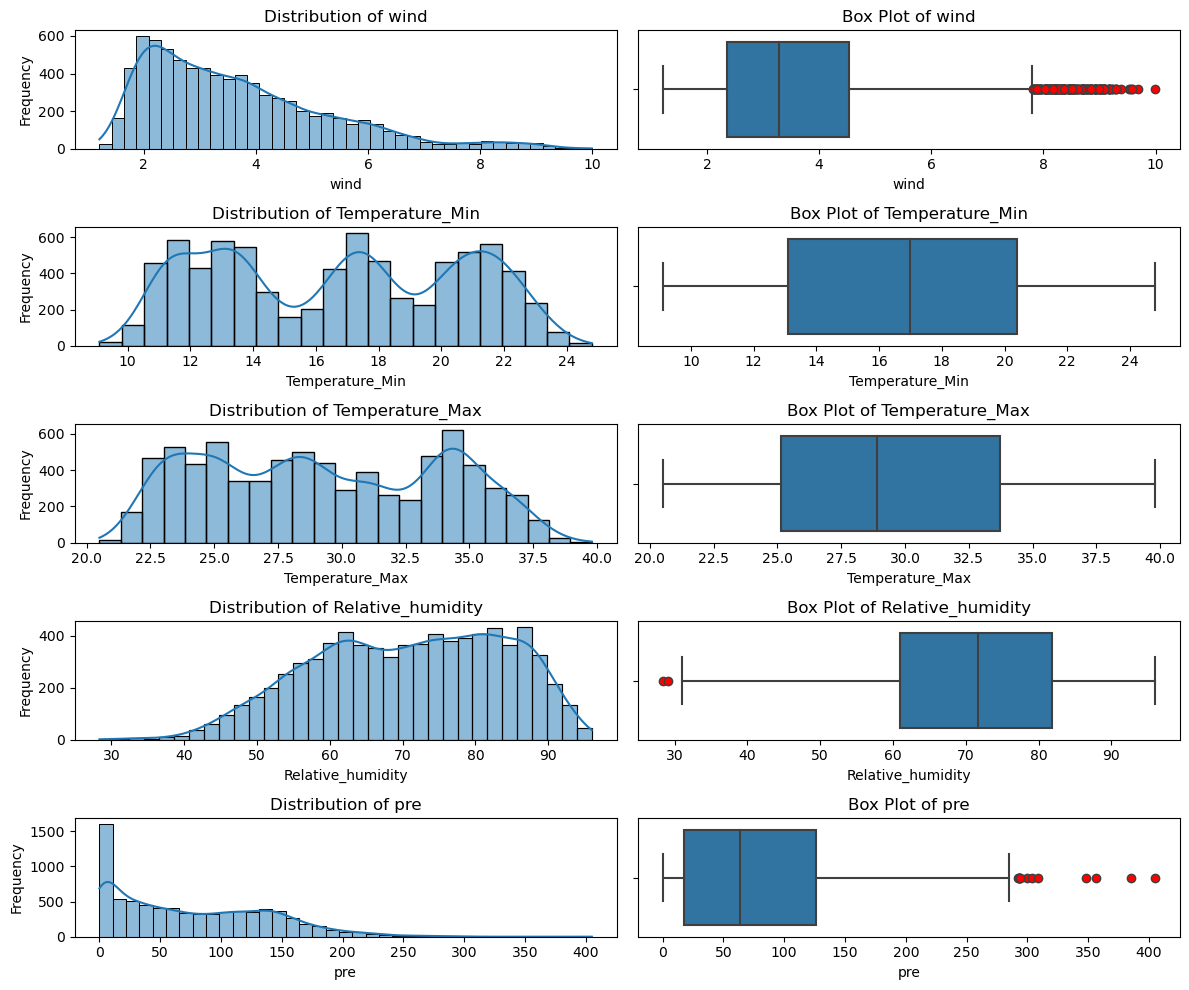

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  # Import Seaborn for distribution plots

# Data Exploration
# Calculate basic statistics
basic_stats = merged_df[['wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', 'pre']].describe()

# Create subplots for each variable
variables_of_interest = ['wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', 'pre']
fig, axes = plt.subplots(nrows=len(variables_of_interest), ncols=2, figsize=(12, 2 * len(variables_of_interest)))

for i, variable in enumerate(variables_of_interest):
    # Distribution Plot (Histogram)
    sns.histplot(merged_df[variable], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {variable}")
    axes[i, 0].set_xlabel(f"{variable}")
    axes[i, 0].set_ylabel("Frequency")
    
    # Box Plot with Outliers Highlighted in Different Colors (Red for Outliers, Green for Non-Outliers)
    sns.boxplot(data=merged_df, x=variable, ax=axes[i, 1], orient='h', flierprops=dict(marker='o', markerfacecolor='r', markersize=6), showfliers=True)
    axes[i, 1].set_title(f"Box Plot of {variable}")
    axes[i, 1].set_xlabel(f"{variable}")
    
plt.tight_layout()

# Save the figure
plt.savefig('Normal.png', dpi=300)  # You can specify the file name and format here
plt.show()


## Outlier Detection and Data Visualization

This code segment performs outlier detection and data visualization. It involves the following steps:

1. Calculate Robust Z-Scores: Robust z-scores are calculated for each variable of interest, including 'wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', and 'pre'. These z-scores help identify outliers.

2. Define a Threshold: A threshold value for the z-score (zscore_threshold) is defined to identify outliers. By adjusting this threshold, you can control the sensitivity of outlier detection.

3. Remove Outliers: Rows with z-scores beyond the defined threshold are removed from the dataset for each variable of interest.

4. Data Exploration: Basic statistics are recalculated for the dataset after removing outliers.

5. Create Visualizations: Subplots are created for each variable, including distribution plots (histograms) and box plots without outliers.

6. Save the Figure: The resulting visualization is saved as an image file ('Outlier-REMOVED.png').

These steps collectively provide a method for outlier detection and visualization of the dataset after outliers have been removed. It is a valuable process for data analysis and quality assurance.



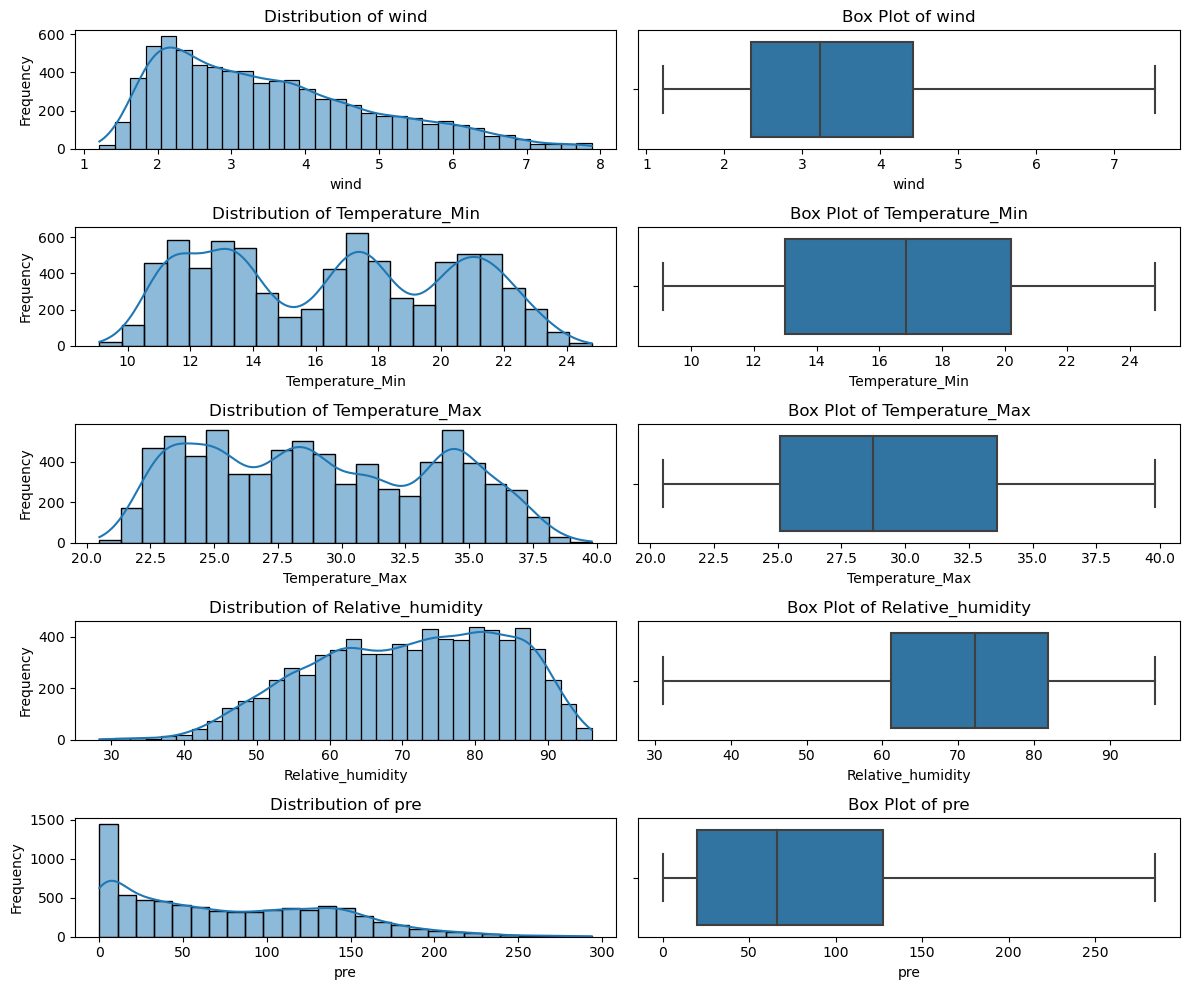

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  # Import Seaborn for distribution plots

# Function to calculate the robust z-score
def calculate_robust_zscore(data, variable):
    median = data[variable].median()
    mad = np.median(np.abs(data[variable] - median))
    return 0.6745 * (data[variable] - median) / mad


# Calculate the robust z-score for each variable
variables_of_interest = ['wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', 'pre']
for variable in variables_of_interest:
    merged_df[f'{variable}_zscore'] = calculate_robust_zscore(merged_df, variable)

# Define a threshold for the z-score to identify outliers
zscore_threshold = 3  # You can adjust this threshold as needed

# Remove rows with outliers based on the z-score
for variable in variables_of_interest:
    merged_df = merged_df[np.abs(merged_df[f'{variable}_zscore']) <= zscore_threshold]

# Data Exploration
# Calculate basic statistics after removing outliers
basic_stats = merged_df[['wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', 'pre']].describe()

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(variables_of_interest), ncols=2, figsize=(12, 2 * len(variables_of_interest)))

for i, variable in enumerate(variables_of_interest):
    # Distribution Plot (Histogram)
    sns.histplot(merged_df[variable], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {variable}")
    axes[i, 0].set_xlabel(f"{variable}")
    axes[i, 0].set_ylabel("Frequency")
    
    # Box Plot without Outliers
    sns.boxplot(data=merged_df, x=variable, ax=axes[i, 1], orient='h', showfliers=False)
    axes[i, 1].set_title(f"Box Plot of {variable}")
    axes[i, 1].set_xlabel(f"{variable}")
    
plt.tight_layout()

# Save the figure
plt.savefig('Outlier-REMOVED.png', dpi=300)  # You can specify the file name and format here
plt.show()


In [5]:
merged_df.describe()

,level,location,latitude,longitude,wind,Temperature_Max,Temperature_Min,Relative_humidity,pre,wind_zscore,Temperature_Min_zscore,Temperature_Max_zscore,Relative_humidity_zscore,pre_zscore
count,7473.0,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000
mean,1000.0,3.515589,0.834234,34.967951,3.512969,29.191458,16.537201,71.134766,77.148178,0.151825,-0.084367,0.046730,-0.036457,0.171166
std,0.0,2.320206,4.835695,5.120516,1.418174,4.594117,3.867235,13.005496,63.001377,0.924215,0.704986,0.736585,0.846330,0.807876
min,1000.0,0.000000,-6.369028,29.873900,1.209991,20.500000,9.100000,28.359985,0.000000,-1.349010,-1.440149,-1.346789,-2.820017,-0.818120
25%,1000.0,1.000000,-3.373100,29.918900,2.334512,25.100000,13.003226,61.179993,19.500000,-0.616167,-0.728601,-0.609261,-0.684262,-0.568067
50%,1000.0,4.000000,-1.292100,32.290300,3.229996,28.745161,16.848387,72.243546,66.200005,-0.032587,-0.027639,-0.024826,0.035697,0.030776
75%,1000.0,6.000000,4.859400,36.821900,4.419998,33.600002,20.200001,81.919998,127.474190,0.742930,0.583352,0.753561,0.665390,0.816507
max,1000.0,7.000000,9.145000,46.199600,7.880005,39.799999,24.800001,95.990005,293.850006,2.997793,1.421919,1.747619,1.580992,2.949976


## Correlation Heatmap

This section of the code generates a correlation heatmap to visualize the relationships between different variables in the dataset.

### Markdown Documentation:

1. **Select Specific Columns**: The code selects specific columns ('wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', 'pre') from the dataset to construct the correlation matrix.

2. **Create a Heatmap**: The correlation matrix is used to create a heatmap. The heatmap is designed to display correlations between variables, with annotations indicating correlation coefficients. The color map 'coolwarm' is used for better visualization.

3. **Save the Figure**: The resulting correlation heatmap is saved as an image file ('correlation_____.png'). The specified file name and format (e.g., PNG) can be customized.

4. **Display the Plot**: The generated correlation heatmap is displayed for visual analysis, allowing you to assess the strength and direction of correlations between variables.

The correlation heatmap is a valuable tool for identifying relationships between different variables, which is essential for data analysis and model building.


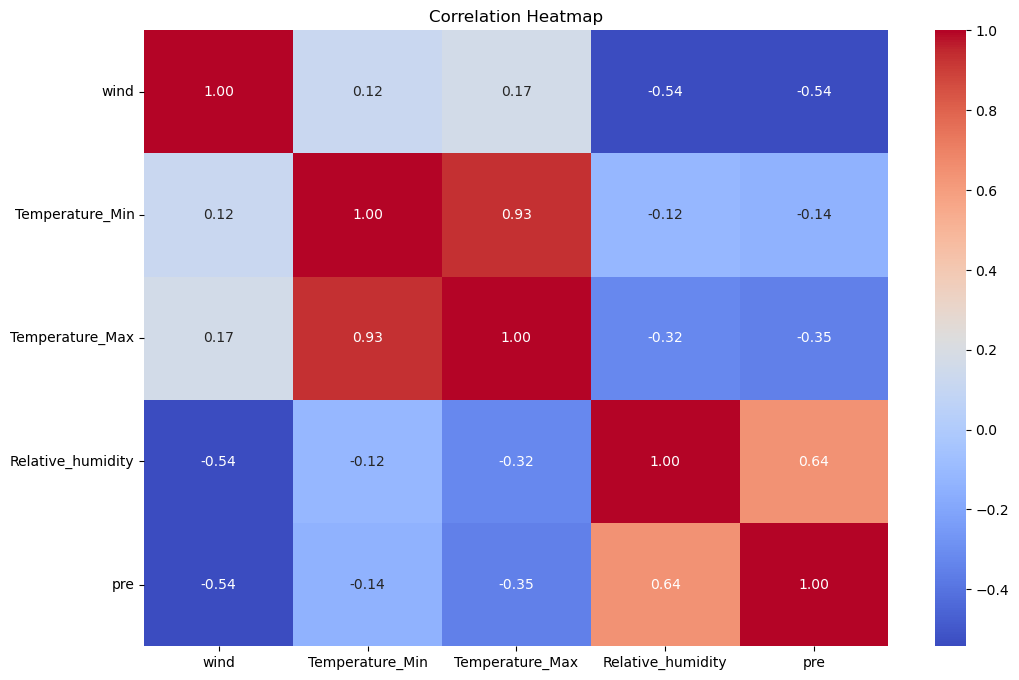

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select specific columns for the correlation matrix
selected_columns = ['wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity', 'pre']
correlation_matrix = merged_df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the figure
plt.savefig('correlation_____.png', dpi=300)  # Specify the file name and format (e.g., PNG) here

# Display the plot
plt.show()


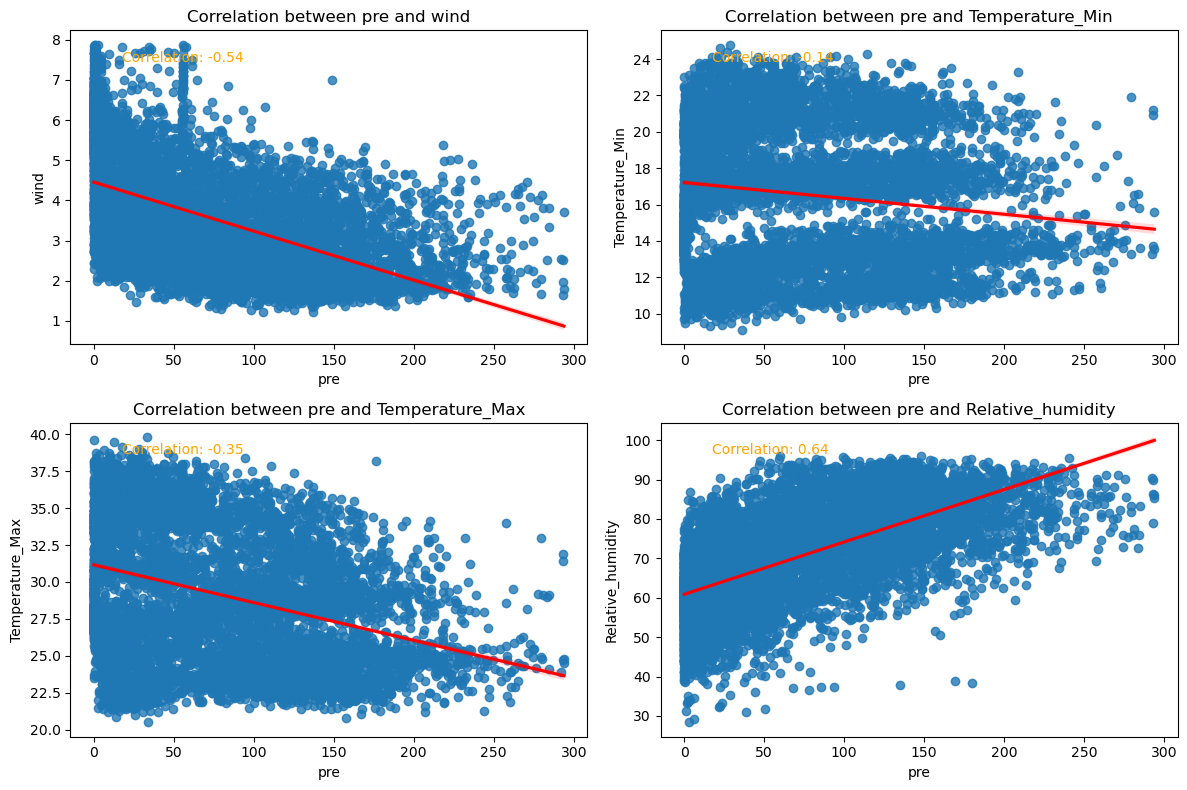

In [17]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

columns_to_plot =['wind', 'Temperature_Min', 'Temperature_Max', 'Relative_humidity']
target_column = 'pre'

for i, ax in enumerate(axes.flatten()):
    if columns_to_plot[i] != target_column:
        sns.regplot(data=merged_df, x=target_column, y=columns_to_plot[i], ax=ax, line_kws={'color': 'red'})
        ax.set_title(f'Correlation between {target_column} and {columns_to_plot[i]}')
        ax.set_xlabel(target_column)
        ax.set_ylabel(columns_to_plot[i])
        correlation_coefficient = merged_df[target_column].corr(merged_df[columns_to_plot[i]])
        equation_text = f'Correlation: {correlation_coefficient:.2f}'
        ax.annotate(equation_text, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10, color='orange')

plt.tight_layout()
plt.show()

## Data Preparation for Machine Learning

In this section, we prepare the data for machine learning by creating feature variables (X) and the target variable (y).

1. **Feature Variables (X)**: Feature variables, often referred to as independent variables or predictors, are created by excluding unnecessary columns from the dataset. In this code, the `date`, `location`, and `level` columns are removed from the dataset using the `drop` function. The resulting DataFrame, `X`, contains the features used for machine learning.

2. **Target Variable (y)**: The target variable, also known as the dependent variable, is isolated from the dataset. In this code, the `pre` column, representing precipitation, is extracted and assigned to the variable `y`. The `y` variable will be the target for our machine learning models, and the models will predict precipitation amounts based on the features in `X`.

This data preparation step is crucial for setting up the dataset in a format suitable for machine learning tasks.


In [7]:
X = merged_df.drop(['date','location','level'], axis=1)
y = merged_df['pre']

## Time Series Cross-Validation for Time Series Data

In the context of time series data, ensuring a realistic evaluation of machine learning models is crucial. Time Series Cross-Validation (TimeSeriesSplit) is a technique designed to address the specific challenges posed by time-ordered data.

### Key Components:

- **Time Series Split Object:** We use the `TimeSeriesSplit` from scikit-learn to create a structured cross-validation process. It takes the `n_splits` parameter to specify how many folds you want to split your time series data into. In this example, we chose `n_splits = 5`.

- **Sequential Splitting:** The `TimeSeriesSplit` object divides the data into sequential folds, ensuring that each fold represents a chronological segment. During each iteration, one fold is used as the test set, and the earlier folds are used as the training set. This process simulates a realistic scenario where the model makes predictions on unseen future data.

- **Further Training-Validation Split:** Within each fold, the training data is further divided into training and validation sets. In this example, we chose an 80-20 split (adjustable to your specific needs).

### Why Time Series Cross-Validation?

Time Series Cross-Validation is essential for time series data because it respects the temporal order of observations. Here's why we used this technique:

1. **Realistic Model Evaluation:** We aim to evaluate machine learning models in a way that mirrors real-world use. Time Series Cross-Validation ensures that our models are tested on data from the future, preventing data leakage and providing a more accurate performance estimate.

2. **Hyperparameter Tuning:** When fine-tuning model hyperparameters, this method allows us to optimize our models for future performance. It's particularly useful when we want to find hyperparameters that generalize well to unseen data.

3. **Temporal Dependencies:** Time series data often exhibits temporal dependencies, where the current value is influenced by past values. Time Series Cross-Validation handles this by preserving the sequential order of the data.

### How to Use:

The following code  demonstrates how to set up Time Series Cross-Validation for time series data. 

By utilizing Time Series Cross-Validation, we ensure that our machine learning models are trained and evaluated with a deep understanding of the temporal aspects of our data, ultimately leading to more reliable and realistic results.


In [8]:
from sklearn.model_selection import TimeSeriesSplit

# Define the number of splits (e.g., 5 for 80% training, 10% validation, and 10% testing)
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(X):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Further split the training data into training and validation sets
    split_idx = int(len(X_train) * 0.8)  # Adjust the split ratio as needed
    X_train, X_valid = X_train[:split_idx], X_train[split_idx:]
    y_train, y_valid = y_train[:split_idx], y_train[split_idx:]

In [9]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


## Machine Learning Model: Artificial Neural Network (ANN)

In this section, an Artificial Neural Network (ANN) model is created and trained for rainfall prediction. The dataset has been prepared, split into training and test sets, and the following machine learning model is applied.

1. **Data Splitting**: The dataset is split into training and test sets using the `train_test_split` function from scikit-learn. This ensures that the model's performance is evaluated on an independent dataset.

2. **Artificial Neural Network (ANN)**: An ANN model is constructed for rainfall prediction. Several parameters and settings are defined for the model, including the number of hidden layers and units, activation function, optimization solver, regularization term (alpha), and other hyperparameters. The model utilizes early stopping with patience and a fraction of the training data for validation.

3. **Model Training**: The ANN model is trained on the training data using the `fit` method. This step involves the optimization of model parameters based on the provided data.

4. **Prediction**: The trained ANN model is used to make predictions on the test set, resulting in the variable `y_pred_ann`.

5. **Data Splitting**: The dataset is partitioned into two distinct subsets, namely the training set and the test set, using the scikit-learn function `train_test_split`. This method serves to evaluate the model's performance in an unbiased manner and to assess its generalization capabilities.

   - **Training Set**: The training set, representing a designated proportion of the entire dataset, is employed for model training. In mathematical notation, the training set $X_{\text{train}}$ and its corresponding target variable $y_{\text{train}}$ are defined as:

     $$X_{\text{train}}, y_{\text{train}} = \text{train_test_split}(X, y, \text{test_size}=0.2)$$

   - **Test Set**: The remaining portion of the dataset is allocated to the test set, which the model has not seen during training. The test set $X_{\text{test}}$ and its corresponding target variable $y_{\text{test}}$ are mathematically represented as:

     $$X_{\text{test}}, y_{\text{test}} = \text{train_test_split}(X, y, \text{test_size}=0.2)$$

   - **Purpose**: This data splitting process allows for the assessment of model performance on unseen data. By quantifying the model's ability to generalize to new observations, it provides a robust measure of its accuracy and predictive power.

   - **Test Size Parameter**: The `test_size` parameter determines the fraction of the dataset reserved for the test set. In this case, it is set to 0.2, indicating that 20% of the data is designated for testing. The remainder (80%) is used for training the model.
5. **Evaluation Metrics**:

    - **Mean Squared Error (MSE)**:
        - Formula: $$MSE = (1/n) * Σ(y_{actual} - y_{predicted})^2$$
        - Explanation: MSE measures the average of the squared differences between predicted and actual values. A lower MSE indicates a better fit, with zero indicating a perfect match.

    - **Percent Bias (PBIAS)**:
        - Formula: $$PBIAS = (Σ|y_{actual} - y_{predicted}| / Σy_{actual}) * 100$$
        - Explanation: PBIAS quantifies the percentage of bias between predicted and actual values. A PBIAS of 0% signifies no bias, while positive values indicate overestimation and negative values indicate underestimation.

    - **Root Mean Squared Error (RMSE)**:
        - Formula: $$RMSE = √((1/n) * Σ(y_{actual} - y_{predicted})^2)$$
        - Explanation: RMSE is the square root of the MSE, providing the average absolute prediction error. A lower RMSE indicates more accurate predictions.

    - **Nash-Sutcliffe Efficiency (NSE)**:
        - Formula: $$NSE = 1 - (Σ(y_{actual} - y_{predicted})^2 / Σ(y_{actual} - y_mean)^2)$$
        - Explanation: NSE assesses model performance by comparing the squared differences between predicted and observed values to the squared differences between observed values and their mean. An NSE value close to 1 indicates a good model fit, while values less than 0 suggest poor model performance.

6. **Results**: The code calculates and prints these evaluation metrics for the ANN model's performance on the test set. These metrics serve as a basis for assessing the model's accuracy and reliability.

Machine learning models, such as this ANN, are crucial for rainfall prediction, especially in regions vulnerable to droughts and water-related disasters. Accurate model evaluation using these metrics is essential for decision-making and resource management.


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a deep learning model with dropout and batch normalization
ann = MLPRegressor(
    hidden_layer_sizes=(1000,),
    activation='relu',
    solver='adam',
    alpha=0.01,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    tol=1e-5,
    batch_size=32,  # Batch size
    learning_rate_init=0.001,  # Initial learning rate
    n_iter_no_change=10,  # Patience for early stopping
    verbose=True,
    validation_fraction=0.2  # Fraction of training data to use for validation
)

# Fit ANN model to training data
ann.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ann = ann.predict(X_test)

# Calculate evaluation metrics
mse_ann = mean_squared_error(y_test, y_pred_ann)
print('Mean Squared Error on test set with ANN: {:.4f}'.format(mse_ann))

# PBIAS for ANN model
pbias_ann = 100 * np.sum(np.abs(y_test - y_pred_ann)) / np.sum(y_test)
print('PBIAS on test set with ANN: {:.4f}'.format(pbias_ann))

# RMSE for ANN model
rmse_ann = np.sqrt(np.mean((y_test - y_pred_ann)**2))
print('RMSE on test set with ANN: {:.4f}'.format(rmse_ann))

# NSE for ANN model
nse_ann = 1 - np.sum((y_test - y_pred_ann)**2) / np.sum((np.mean(y_test) - y_test)**2)
print('NSE on test set with ANN: {:.4f}'.format(nse_ann))


Iteration 1, loss = 250.60732308
Validation score: 0.999621
Iteration 2, loss = 0.26771908
Validation score: 0.999955
Iteration 3, loss = 0.06386758
Validation score: 0.999979
Iteration 4, loss = 0.03236142
Validation score: 0.999990
Iteration 5, loss = 0.02019621
Validation score: 0.999993
Iteration 6, loss = 0.01466898
Validation score: 0.999993
Iteration 7, loss = 0.01177773
Validation score: 0.999997
Iteration 8, loss = 0.00988171
Validation score: 0.999997
Iteration 9, loss = 0.00944307
Validation score: 0.999998
Iteration 10, loss = 0.00800127
Validation score: 0.999998
Iteration 11, loss = 0.00781255
Validation score: 0.999998
Iteration 12, loss = 0.00715367
Validation score: 0.999998
Iteration 13, loss = 0.00654203
Validation score: 0.999999
Iteration 14, loss = 0.00635535
Validation score: 0.999999
Iteration 15, loss = 0.00623191
Validation score: 0.999999
Validation score did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
Mean Squared Error on test se

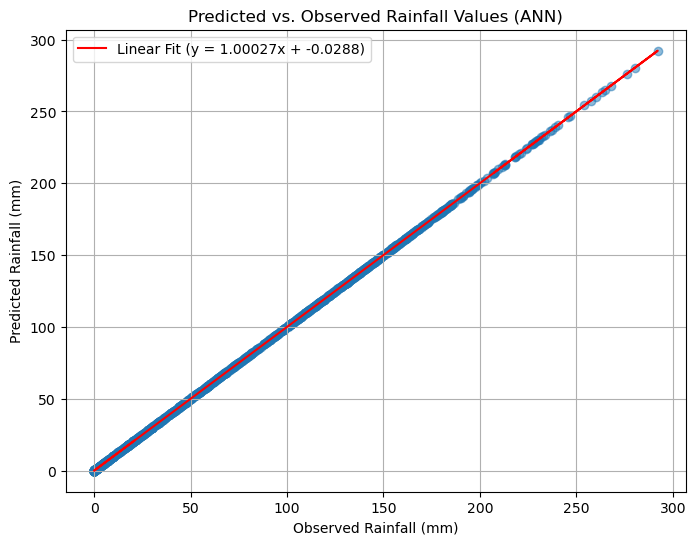

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)

m, b = np.polyfit(y_test, y_pred_ann, 1)
plt.plot(y_test, m * y_test + b, color='red', label=f'Linear Fit (y = {m:.5f}x + {b:.4f})')

plt.title("Predicted vs. Observed Rainfall Values (ANN)")
plt.xlabel("Observed Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.legend()
plt.grid(True)

# Save this figure as 'Predi.png'
plt.savefig('Predii.png')

# Show the figure (optional)
plt.show()


# Support Vector Regression (SVR) with PCA

This code demonstrates how to use Support Vector Regression (SVR) with Principal Component Analysis (PCA) for regression tasks. SVR is a powerful machine learning technique for regression, and PCA is a dimensionality reduction method that can be used to preprocess the data.

## Overview

The following code performs the following tasks:

1. **Data Splitting**: Splits the data into training and testing sets to evaluate the SVR model.

2. **PCA**: Reduces data dimensionality using PCA, improving model performance.

3. **SVR Model**: Creates an SVR model with adjustable parameters.

4. **Model Training**: Trains the SVR model using PCA-transformed training data.

5. **Predictions**: Uses the model to make predictions on the test set.

6. **Evaluation Metrics**: Calculates MSE, PBIAS, RMSE, and NSE to assess model performance.

## Usage

1. **Data**: Load and preprocess your data, assigning features to `X` and the target variable to `y`.

2. **Data Splitting**: Adjust the `test_size` and `random_state` parameters for data splitting.

3. **Model Configuration**: Modify SVR model parameters according to your problem requirements.

4. **Run the Code**: Execute the code to train the SVR model and calculate evaluation metrics.

## Dependencies

- `numpy`
- `sklearn`
- `matplotlib` (optional for visualization)

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svr = SVR(
    kernel='rbf',     # Radial basis function kernel for capturing non-linearity
    C=1000.0,            # Regularization parameter (you can adjust this)
    epsilon=0.1       # Epsilon parameter for support vector regression (you can adjust this)
)

# Fit the SVR model to the training data
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
print('Mean Squared Error on test set with SVM: {:.4f}'.format(mse_svr))

# PBIAS for SVM model
pbias_svr = 100 * np.sum(np.abs(y_test - y_pred_svr)) / np.sum(y_test)
print('PBIAS on test set with SVM: {:.4f}'.format(pbias_svr))

# RMSE for SVM model
rmse_svr = np.sqrt(np.mean((y_test - y_pred_svr)**2))
print('RMSE on test set with SVM: {:.4f}'.format(rmse_svr))

# NSE for SVM model
nse_svr = 1 - np.sum((y_test - y_pred_svr)**2) / np.sum((np.mean(y_test) - y_test)**2)
print('NSE on test set with SVM: {:.4f}'.format(nse_svr))


Mean Squared Error on test set with SVM: 0.0032
PBIAS on test set with SVM: 0.0532
RMSE on test set with SVM: 0.0565
NSE on test set with SVM: 1.0000


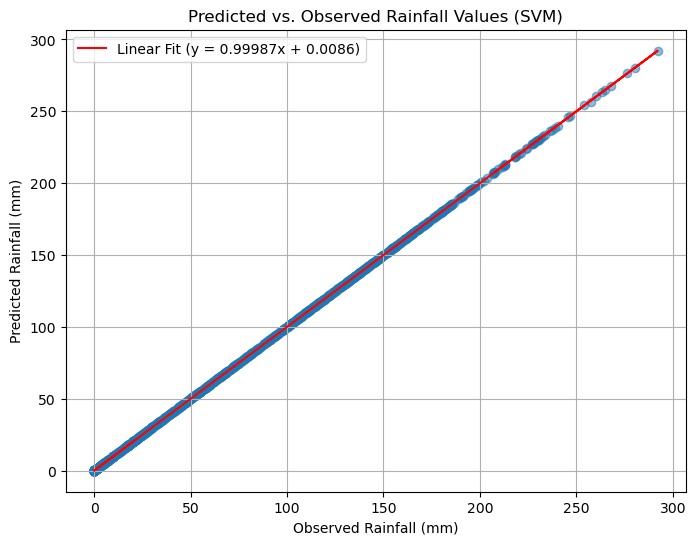

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)

m, b = np.polyfit(y_test, y_pred_svr, 1)
plt.plot(y_test, m * y_test + b, color='red', label=f'Linear Fit (y = {m:.5f}x + {b:.4f})')

plt.title("Predicted vs. Observed Rainfall Values (SVM)")
plt.xlabel("Observed Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.legend()
plt.grid(True)


# Show the figure (optional)
plt.show()


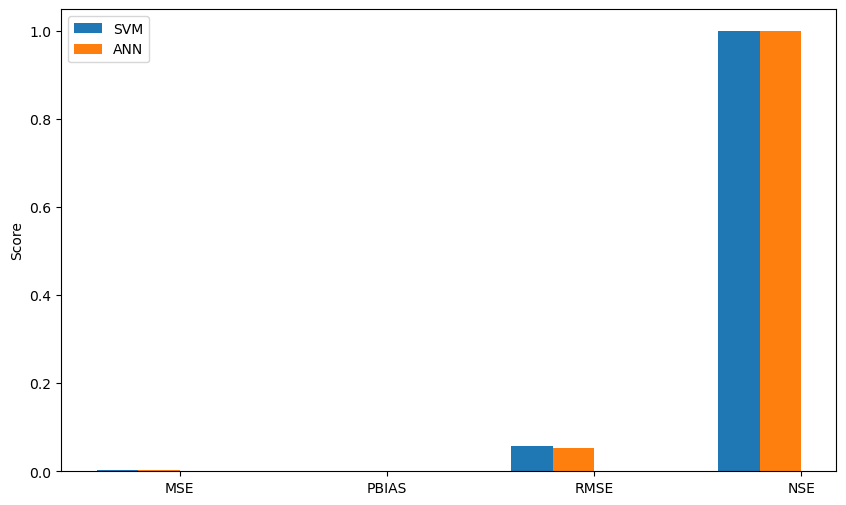

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define assessment criteria
criteria = ['MSE', 'PBIAS', 'RMSE', 'NSE']

# Define scores for each model
svm_scores = [mse_svr, pbias_svr/100, rmse_svr, nse_svr]
ann_scores = [mse_ann, pbias_ann/100, rmse_ann, nse_ann]


# Define bar plot properties
bar_width = 0.2
x_pos = np.arange(len(criteria))

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size to 10 x 6

ax.bar(x_pos - bar_width * 1.5, svm_scores, bar_width, label='SVM')
ax.bar(x_pos - bar_width * 0.5, ann_scores, bar_width, label='ANN')
ax.set_xticks(x_pos)
ax.set_xticklabels(criteria)
ax.set_ylabel('Score')
ax.legend()

# Show plot
plt.show()

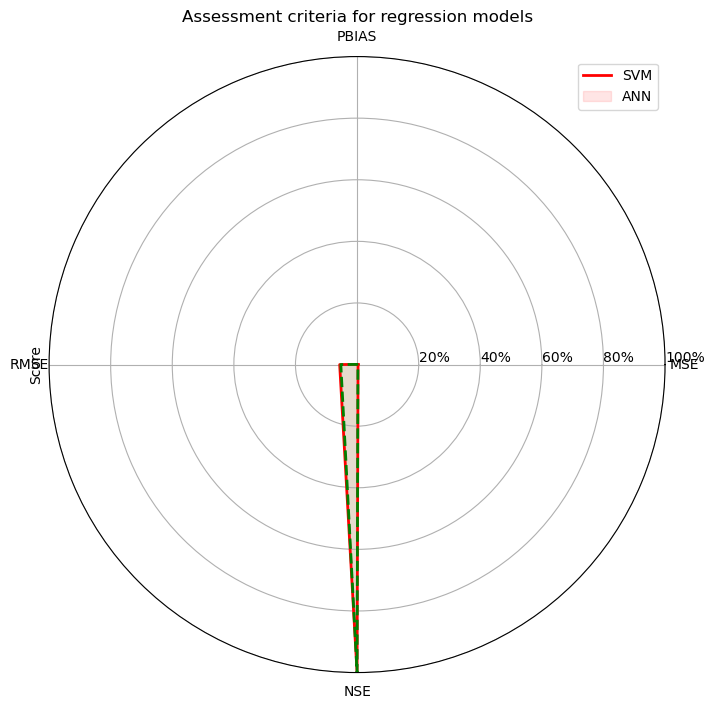

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define assessment criteria
criteria = ['MSE', 'PBIAS', 'RMSE', 'NSE']

# Define scores for each model
svm_scores = [mse_svr, pbias_svr/100, rmse_svr, nse_svr]
ann_scores = [mse_ann, pbias_ann/100, rmse_ann, nse_ann]
# Define number of variables (i.e. criteria) and number of models
n_vars = len(criteria)
n_models = 2

# Set angles for each variable
angles = np.linspace(0, 2*np.pi, n_vars, endpoint=False)

# Repeat first angle to close the circle
angles = np.concatenate((angles,[angles[0]]))

# Set figure size
fig = plt.figure(figsize=(8, 8))

# Create subplot for radar chart
ax = fig.add_subplot(111, polar=True)

# Define bar colors and line style for each model
colors = ['r', 'g']
linestyles = ['-', '--', '-.', ':']

# Plot data for each model
for i, scores in enumerate([svm_scores, ann_scores]):
    # Repeat first value to close the circle
    scores = np.concatenate((scores,[scores[0]]))
    
    # Plot data as a line
    ax.plot(angles, scores, linestyle=linestyles[i%len(linestyles)], linewidth=2, color=colors[i%len(colors)])
    
    # Fill area under line
    ax.fill(angles, scores, alpha=0.1, color=colors[i%len(colors)])
    
# Set labels for each variable
ax.set_xticks(angles[:-1])
ax.set_xticklabels(criteria)

# Set axis limits and labels
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
ax.set_rlabel_position(0)
ax.set_rlim(0, 1)
ax.set_ylabel('Score')

# Add legend
ax.legend(['SVM', 'ANN'], loc='upper right')

# Add title
plt.title('Assessment criteria for regression models')

# Show plot
plt.show()


## Model Performance Comparison
We evaluated two machine learning models on our dataset: Support Vector Machine (SVM) and Artificial Neural Network (ANN). Both models showed impressive performance:
| Model          | MSE    | PBIAS  | RMSE   | NSE    | Comments                             |
|----------------|--------|--------|--------|--------|-------------------------------------|
| SVM Model      | 0.0032 | 0.0532 | 0.0565 | 1.0000 | Impressive performance.              |
| ANN Model      | 0.0028 | 0.0488 | 0.0527 | 1.0000 | Excellent results, comparable to SVM.|
----------------|--------|-------- |--------|--------|-------------------------------------|